In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
survey_raw_df = pd.read_csv('C:/python/data/survey_results_public.csv',index_col = 'ResponseId')
survey_raw_df

MainBranch  \
ResponseId                                                      
1                                               None of these   
2                              I am a developer by profession   
3           I am not primarily a developer, but I write co...   
4                              I am a developer by profession   
5                              I am a developer by profession   
...                                                       ...   
73264                          I am a developer by profession   
73265                          I am a developer by profession   
73266       I am not primarily a developer, but I write co...   
73267                          I am a developer by profession   
73268       I used to be a developer by profession, but no...   

                                                   Employment  \
ResponseId                                                      
1                                                         NaN   
2                                         Employed, full-time   
3                                         Employed, full-time   
4                                         Employed, full-time   
5                                         Employed, full-time   
...                                                       ...   
73264                                     Employed, full-time   
73265                                     Employed, full-time   
73266                                     Employed, full-time   
73267                                     Employed, full-time   
73268       Independent contractor, freelancer, or self-em...   

                                      RemoteWork  \
ResponseId                                         
1                                            NaN   
2                                   Fully remote   
3           Hybrid (some remote, some in-person)   
4                                   Fully remote   
5           Hybrid (some remote, some in-person)   
...                                          ...   
73264                               Fully remote   
73265                             Full in-person   
73266       Hybrid (some remote, some in-person)   
73267       Hybrid (some remote, some in-person)   
73268                               Fully remote   

                                             CodingActivities  \
ResponseId                                                      
1                                                         NaN   
2                    Hobby;Contribute to open-source projects   
3                                                       Hobby   
4                                I don’t code outside of work   
5                                                       Hobby   
...                                                       ...   
73264                                 Freelance/contract work   
73265                                                   Hobby   
73266                           Hobby;School or academic work   
73267                                                   Hobby   
73268       Hobby;Contribute to open-source projects;Boots...   

                                                    EdLevel  \
ResponseId                                                    
1                                                       NaN   
2                                                       NaN   
3           Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
4              Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
5              Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
...                                                     ...   
73264          Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
73265       Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
73266          Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
73267          Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
73268          Bachelor’s degree (B.A., B.S., B.Eng., etc.)   

                

In [7]:
schema_raw = pd.read_csv('C:/python/data/survey_results_schema.csv',index_col ='qname')['question']
schema_raw

qname
S0             <div><span style="font-size:19px;"><strong>Hel...
MetaInfo                                       Browser Meta Info
S1             <span style="font-size:22px; font-family: aria...
MainBranch     Which of the following options best describes ...
Employment     Which of the following best describes your cur...
                                     ...                        
Frequency_2    Interacting with people outside of your immedi...
Frequency_3    Encountering knowledge silos (where one indivi...
TrueFalse_1    Are you involved in supporting new hires durin...
TrueFalse_2    Do you use learning resources provided by your...
TrueFalse_3    Does your employer give you time to learn new ...
Name: question, Length: 79, dtype: object

In [8]:
pd.set_option('display.max_columns',78)    #표현되는 column의 최대 개수
pd.set_option('display.max_rows',78)       #표현되는 rows의 최대 개수

In [9]:
selected_columns = [
    # 인구 통계
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    # 프로그래밍 경험
    'YearsCode',
    'YearsCodePro',
    'LanguageHaveWorkedWith',
    'LanguageWantToWorkWith',
    'LearnCodeCoursesCert',
    'ProfessionalTech',
    'SOAccount',
    # 고용 관련 정보
    'Employment',
    'DevType',
    'WorkExp',
]

In [10]:
survey_df = survey_raw_df[selected_columns].copy()
survey_df

Country  \
ResponseId                                                      
1                                                         NaN   
2                                                      Canada   
3           United Kingdom of Great Britain and Northern I...   
4                                                      Israel   
5                                    United States of America   
...                                                       ...   
73264                                                 Nigeria   
73265                                United States of America   
73266                                United States of America   
73267       United Kingdom of Great Britain and Northern I...   
73268                                                  Canada   

                        Age Gender  \
ResponseId                           
1                       NaN    NaN   
2                       NaN    NaN   
3           25-34 years old    Man   
4           35-44 years old    Man   
5           25-34 years old    NaN   
...                     ...    ...   
73264       25-34 years old    Man   
73265       25-34 years old    Man   
73266       55-64 years old    Man   
73267       55-64 years old    Man   
73268       25-34 years old    Man   

                                                    EdLevel YearsCode  \
ResponseId                                                              
1                                                       NaN       NaN   
2                                                       NaN       NaN   
3           Master’s degree (M.A., M.S., M.Eng., MBA, etc.)        14   
4              Bachelor’s degree (B.A., B.S., B.Eng., etc.)        20   
5              Bachelor’s degree (B.A., B.S., B.Eng., etc.)         8   
...                                                     ...       ...   
73264          Bachelor’s degree (B.A., B.S., B.Eng., etc.)         8   
73265       Master’s degree (M.A., M.S., M.Eng., MBA, etc.)         6   
73266          Bachelor’s degree (B.A., B.S., B.Eng., etc.)        42   
73267          Bachelor’s degree (B.A., B.S., B.Eng., etc.)        50   
73268          Bachelor’s degree (B.A., B.S., B.Eng., etc.)        16   

           YearsCodePro                             LanguageHaveWorkedWith  \
ResponseId                                                                   
1                   NaN                                                NaN   
2                   NaN                              JavaScript;TypeScript   
3                     5                  C#;C++;HTML/CSS;JavaScript;Python   
4                    17                       C#;JavaScript;SQL;TypeScript   
5                     3        C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript   
...                 ...                                                ...   
73264                 5  Bash/Shell;Dart;JavaScript;PHP;Python;SQL;Type...   
73265                 5          Bash/Shell;HTML/CSS;JavaScript;Python;SQL   
73266                33                 HTML/CSS;JavaScript;PHP;Python;SQL   
73267                31                                      C#;Delphi;VBA   
73268                 5        C#;JavaScript;Lua;PowerShell;SQL;TypeScript   

                                    LanguageWantToWorkWith  \
ResponseId                                                   
1                                                      NaN   
2                                          Rust;TypeScript   
3                    C#;C++;HTML/CSS;JavaScript;TypeScript   
4                                        C#;SQL;TypeScript   
5               C#;Elixir;F#;Go;JavaScript;Rust;TypeScript   
...                                                    ...   
73264       Bash/Shell;Go;JavaScript;Python;SQL;TypeScript   
73265                           HTML/CSS;JavaScript;Python   
73266                C#;HTML/CSS;JavaScript;PHP;Python;SQL   
73267                                               Delphi   
7326

In [11]:
survey_df.DevType.value_counts()

Developer, full-stack                                                                                                                                                                                                                                                                                                                                                                                                                  7142
Developer, back-end                                                                                                                                                                                                                                                                                                                                                                                                                    5301
Developer, front-end                                                                                                                            

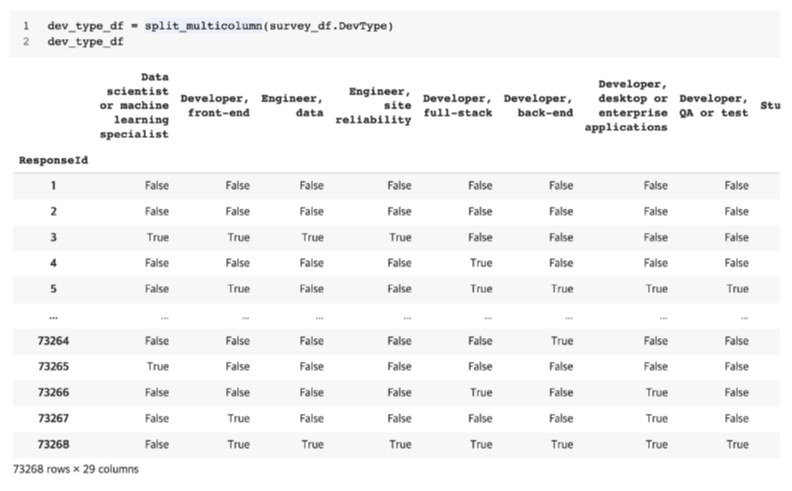

### DevType column을 제일 작은 단위의 응답 항목으로 나누어 DataFrame형태로 만들어 보도록 하겠습니다.
### Series를 인자로 받는다     Seire 값이 DataFrame 으로 바뀌어야 하고 그사이에 ';' 가 들어가야함
### value의 구분자는 ';'
### Seires는 items() 메세드를 사용해 루프가능
### 반환값으로 각 제일 작은 단위의 응답 항목을 column으로 갖는 DataFrame을 준다
### 응답자가 제일 작은 단위의 기술스텍을 선택한 경우 : 해당 열의 값을 True로, 아닌경우 False로 한다

In [12]:
sur_dev = survey_df['DevType'].notnull()
sur_dev

ResponseId
1        False
2        False
3         True
4         True
5         True
         ...  
73264     True
73265     True
73266     True
73267     True
73268     True
Name: DevType, Length: 73268, dtype: bool

In [13]:
def split_multicolumn(col_series):
    # 반환할 DataFrame이자 최초의 col_series도 담는다.
    result_df = pd.DataFrame(col_series.values, index=col_series.index, columns=["DevType"])
    # result_df = col_series.to_frame() --> 위의 코드와 같다.
    # 기술 스텍 목록을 담았다가 마지막 반환할 때 인덱싱으로 활용
    options = []
    # NaN 값을 갖는 row를 제외하고 반복
    for idx, value  in col_series[col_series.notnull()].items():
        # value를 가져와 ';'를 기준으로 분리하여 각 기술 스텍 문자열 리스트를 만든다.
        for option in value.split(';'):
            # 현재 option이 result_df.columns에 없으면 추가한다.
            if option not in result_df.columns:
                options.append(option)
                result_df[option] = False
            # 파싱한 기술 스텍에 해당하는 column의 값에 True를 넣는다.
            result_df.at[idx, option] = True
            # result_df.loc[idx, option] = True
    return result_df[options]
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.at.html

In [14]:
dev_type_df = split_multicolumn(survey_df.DevType)
dev_type_df

Data scientist or machine learning specialist  \
ResponseId                                                  
1                                                   False   
2                                                   False   
3                                                    True   
4                                                   False   
5                                                   False   
...                                                   ...   
73264                                               False   
73265                                                True   
73266                                               False   
73267                                               False   
73268                                               False   

            Developer, front-end  Engineer, data  Engineer, site reliability  \
ResponseId                                                                     
1                          False           False                       False   
2                          False           False                       False   
3                           True            True                        True   
4                          False           False                       False   
5                           True           False                       False   
...                          ...             ...                         ...   
73264                      False           False                       False   
73265                      False           False                       False   
73266                      False           False                       False   
73267                       True           False                       False   
73268                       True            True                        True   

            Developer, full-stack  Developer, back-end  \
ResponseId                                               
1                           False                False   
2                           False                False   
3                           False                False   
4                            True                False   
5                            True                 True   
...                           ...                  ...   
73264                       False                 True   
73265                       False                False   
73266                        True                False   
73267                       False                False   
73268                        True                 True   

            Developer, desktop or enterprise applications  \
ResponseId                                                  
1                                                   False   
2                                                   False   
3                                                   False   
4                                                   False   
5                                                    True   
...                                                   ...   
73264                                               False   
73265                                               False   
73266                                                True   
73267                                                True   
73268                                                True   

            Developer, QA or test  Student  Developer, mobile  Educator  \
ResponseId                                                                
1                           False    False              False     False   
2                           False    False              False     False   
3                           False    False              False     False   
4                           False    False              False     False   
5                            True    False              False     False   
...                           ...      ...                ...       ...   
73264                       

In [15]:
# 데이터 값이 적을때
temp = []
for _, value in survey_df["DevType"].dropna().items():
    temp.extend(value.split(';'))
temp
result = list(set(temp))
result

['Engineer, data',
 'Developer, desktop or enterprise applications',
 'System administrator',
 'Educator',
 'Senior Executive (C-Suite, VP, etc.)',
 'Student',
 'Developer, full-stack',
 'Security professional',
 'Data or business analyst',
 'Cloud infrastructure engineer',
 'Developer, embedded applications or devices',
 'Project manager',
 'DevOps specialist',
 'Engineer, site reliability',
 'Product manager',
 'Engineering manager',
 'Scientist',
 'Academic researcher',
 'Developer, back-end',
 'Developer, QA or test',
 'Designer',
 'Blockchain',
 'Developer, mobile',
 'Developer, game or graphics',
 'Other (please specify):',
 'Data scientist or machine learning specialist',
 'Database administrator',
 'Developer, front-end',
 'Marketing or sales professional']

In [16]:
survey_df.DevType.dropna().str.split(';')

ResponseId
3        [Data scientist or machine learning specialist...
4                                  [Developer, full-stack]
5        [Developer, front-end, Developer, full-stack, ...
8                         [Developer, full-stack, Student]
9                                    [Developer, back-end]
                               ...                        
73264                                [Developer, back-end]
73265      [Data scientist or machine learning specialist]
73266    [Developer, full-stack, Developer, desktop or ...
73267    [Developer, front-end, Developer, desktop or e...
73268    [Developer, front-end, Engineer, data, Enginee...
Name: DevType, Length: 61302, dtype: object

In [17]:
def split_multicolumn(Series):
    df = pd.DataFrame(False, columns = (Series.dropna().str.split(';').str[0].unique()), index = Series.index)
    # for idx, rep in Series[Series.notnull()].str.split(';').items:
    #     for one in rep:
    #         df.at[idx, one.strip()] = True
    for idx, rep in Series.str.split(';').items():
        # NaN이 아닌 값을 분기
        if isinstance(rep, list):
            for one in rep:
                df.at[idx, one.strip()] = True
        else :
            pass
    return df
split_multicolumn(survey_df['DevType'])

Data scientist or machine learning specialist  \
ResponseId                                                  
1                                                   False   
2                                                   False   
3                                                    True   
4                                                   False   
5                                                   False   
...                                                   ...   
73264                                               False   
73265                                                True   
73266                                               False   
73267                                               False   
73268                                               False   

            Developer, full-stack  Developer, front-end  Developer, back-end  \
ResponseId                                                                     
1                           False                 False                False   
2                           False                 False                False   
3                           False                  True                False   
4                            True                 False                False   
5                            True                  True                 True   
...                           ...                   ...                  ...   
73264                       False                 False                 True   
73265                       False                 False                False   
73266                        True                 False                False   
73267                       False                  True                False   
73268                        True                  True                 True   

            Developer, desktop or enterprise applications  \
ResponseId                                                  
1                                                   False   
2                                                   False   
3                                                   False   
4                                                   False   
5                                                    True   
...                                                   ...   
73264                                               False   
73265                                               False   
73266                                                True   
73267                                                True   
73268                                                True   

            Engineering manager  Engineer, data  Student  \
ResponseId                                                 
1                         False           False    False   
2                         False           False    False   
3                         False            True    False   
4                         False           False    False   
5                         False           False    False   
...                         ...             ...      ...   
73264                     False           False    False   
73265                     False           False    False   
73266                     False           False    False   
73267                     False           False    False   
73268                     False            True     True   

            Other (please specify):  Engineer, site reliability  \
ResponseId                                                        
1                             False                       False   
2                             False                       False   
3                             False                        True   
4                             False                       False   
5                             False                       False   
...                             ...                         ...   
73264                         False                       False   

In [18]:
dev_type_totals = dev_type_df.sum().sort_values(ascending = False)  # sum으로 집계/ False는 내림차순
dev_type_totals

Developer, full-stack                            28701
Developer, back-end                              26595
Developer, front-end                             15915
Developer, desktop or enterprise applications     9546
Developer, mobile                                 7634
DevOps specialist                                 6170
Student                                           5595
Cloud infrastructure engineer                     5283
Database administrator                            4934
System administrator                              4908
Developer, embedded applications or devices       3923
Project manager                                   3897
Designer                                          3764
Engineer, data                                    3600
Engineering manager                               3574
Data scientist or machine learning specialist     3424
Data or business analyst                          3201
Developer, QA or test                             3096
Academic r

In [19]:
devtype_percentage = dev_type_totals = dev_type_totals / dev_type_totals.sum() *100
devtype_percentage

Developer, full-stack                            17.416712
Developer, back-end                              16.138722
Developer, front-end                              9.657746
Developer, desktop or enterprise applications     5.792827
Developer, mobile                                 4.632563
DevOps specialist                                 3.744159
Student                                           3.395230
Cloud infrastructure engineer                     3.205898
Database administrator                            2.994114
System administrator                              2.978336
Developer, embedded applications or devices       2.380606
Project manager                                   2.364828
Designer                                          2.284119
Engineer, data                                    2.184599
Engineering manager                               2.168821
Data scientist or machine learning specialist     2.077796
Data or business analyst                          1.9424

In [20]:
round(devtype_percentage.sum(),1)

100.0

In [21]:
import matplotlib.font_manager as font_manager
import matplotlib as mpl
# Add every font at the specified location
font_dir = ['C:/python/fonts']
for font in font_manager.findSystemFonts(fontpaths=font_dir):
    print(mpl.font_manager.FontProperties(fname=font).get_name()) 
    font_manager.fontManager.addfont(font)
# Set font family globally
mpl.rcParams['font.family'] = 'Nanum Pen Script'
print(mpl.rcParams['font.family'])

NanumBarunpen
NanumGothic
Nanum Pen Script
['Nanum Pen Script']


In [22]:
mpl.rcParams['axes.unicode_minus'] = False

In [23]:
sns.set_style('darkgrid')
mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.figsize'] = (9,5)
mpl.rcParams['figure.facecolor'] = '#00000000'

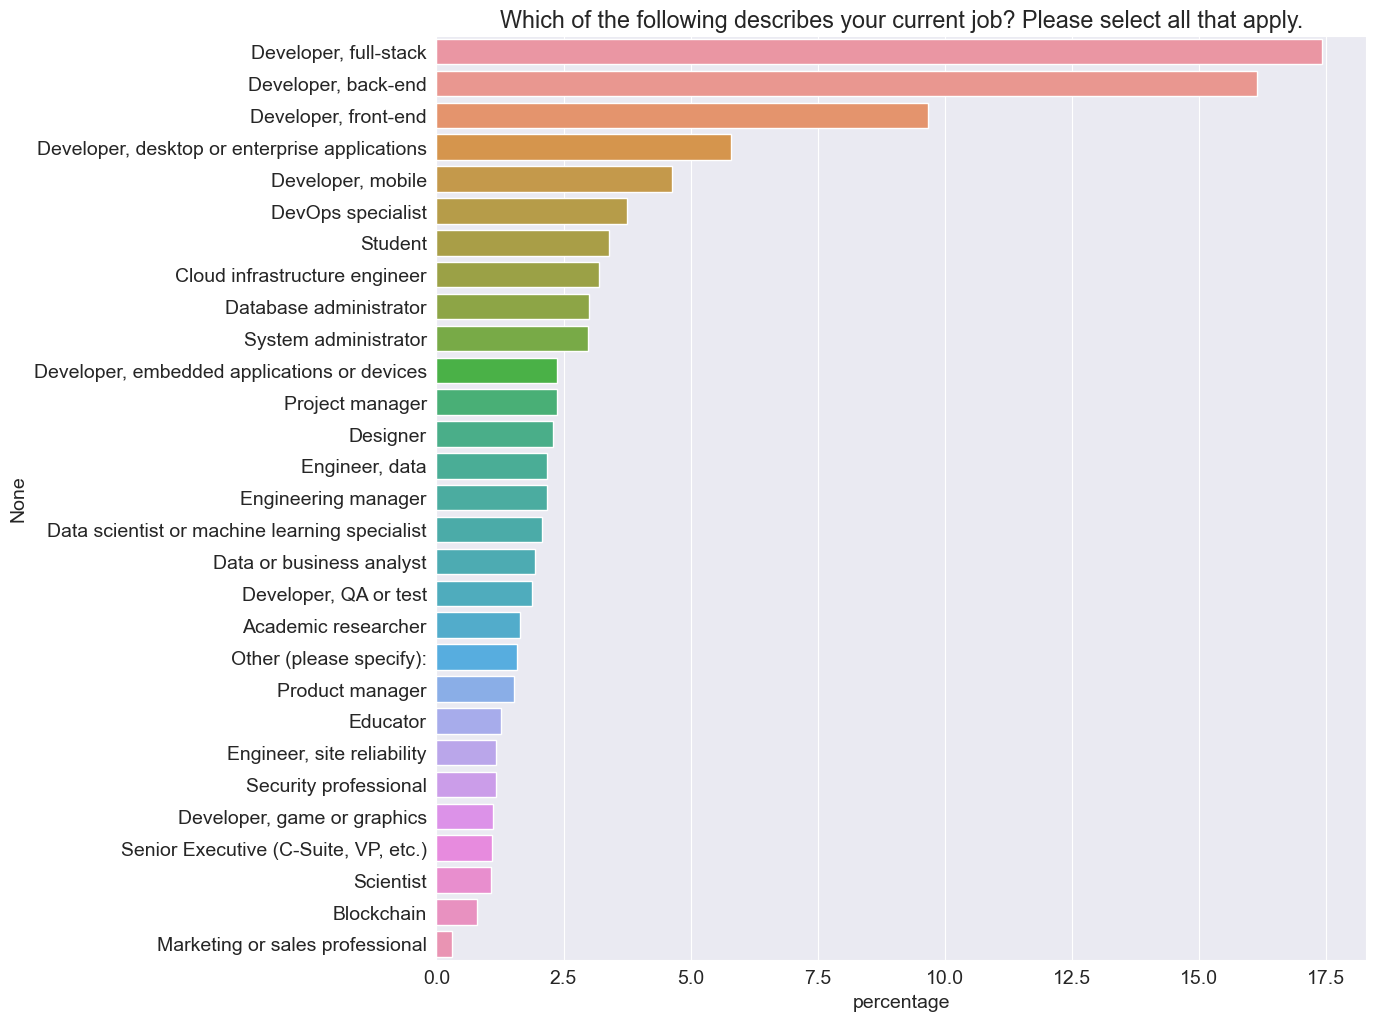

In [24]:
plt.figure(figsize = (12,12))
plt.title(schema_raw['DevType'])
sns.barplot(x = devtype_percentage, y = devtype_percentage.index)
plt.ylabel('None')
plt.xlabel('percentage')
plt.show()

In [25]:
survey_df.LanguageHaveWorkedWith

ResponseId
1                                                      NaN
2                                    JavaScript;TypeScript
3                        C#;C++;HTML/CSS;JavaScript;Python
4                             C#;JavaScript;SQL;TypeScript
5              C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript
                               ...                        
73264    Bash/Shell;Dart;JavaScript;PHP;Python;SQL;Type...
73265            Bash/Shell;HTML/CSS;JavaScript;Python;SQL
73266                   HTML/CSS;JavaScript;PHP;Python;SQL
73267                                        C#;Delphi;VBA
73268          C#;JavaScript;Lua;PowerShell;SQL;TypeScript
Name: LanguageHaveWorkedWith, Length: 73268, dtype: object

In [26]:
def split_multicolumn(Series):
    df = pd.DataFrame(False, columns = (Series.dropna().str.split(';').str[0].unique()), index = Series.index)
    # for idx, rep in Series[Series.notnull()].str.split(';').items:
    #     for one in rep:
    #         df.at[idx, one.strip()] = True
    for idx, rep in Series.str.split(';').items():
        # NaN이 아닌 값을 분기
        if isinstance(rep, list):
            for one in rep:
                df.at[idx, one.strip()] = True
        else :
            pass
    return df
split_multicolumn(survey_df['LanguageHaveWorkedWith'])

JavaScript     C#    C++      C  Delphi  Bash/Shell  Elixir  \
ResponseId                                                                
1                False  False  False  False   False       False   False   
2                 True  False  False  False   False       False   False   
3                 True   True   True  False   False       False   False   
4                 True   True  False  False   False       False   False   
5                 True   True  False  False   False       False   False   
...                ...    ...    ...    ...     ...         ...     ...   
73264             True  False  False  False   False        True   False   
73265             True  False  False  False   False        True   False   
73266             True  False  False  False   False       False   False   
73267            False   True  False  False    True       False   False   
73268             True   True  False  False   False       False   False   

            HTML/CSS  Python    VBA   Dart  MATLAB   Java  Haskell  Assembly  \
ResponseId                                                                     
1              False   False  False  False   False  False    False     False   
2              False   False  False  False   False  False    False     False   
3               True    True  False  False   False  False    False     False   
4              False   False  False  False   False  False    False     False   
5               True   False  False  False   False  False    False     False   
...              ...     ...    ...    ...     ...    ...      ...       ...   
73264          False    True  False   True   False  False    False     False   
73265           True    True  False  False   False  False    False     False   
73266           True    True  False  False   False  False    False     False   
73267          False   False   True  False   False  False    False     False   
73268          False   False  False  False   False  False    False     False   

            Groovy     Go  Swift    APL  Crystal    PHP  Clojure  Erlang  \
ResponseId                                                                 
1            False  False  False  False    False  False    False   False   
2            False  False  False  False    False  False    False   False   
3            False  False  False  False    False  False    False   False   
4            False  False  False  False    False  False    False   False   
5            False  False   True  False    False  False    False   False   
...            ...    ...    ...    ...      ...    ...      ...     ...   
73264        False  False  False  False    False   True    False   False   
73265        False  False  False  False    False  False    False   False   
73266        False  False  False  False    False   True    False   False   
73267        False  False  False  False    False  False    False   False   
73268        False  False  False  False    False  False    False   False   

             Rust   Ruby   Perl  Kotlin  TypeScript    SQL    Lua  COBOL  \
ResponseId                                                                 
1           False  False  False   False       False  False  False  False   
2           False  False  False   False        True  False  False  False   
3           False  False  False   False       False  False  False  False   
4           False  False  False   False        True   True  False  False   
5           False  False  False   False        True   True  False  False   
...           ...    ...    ...     ...         ...    ...    ...    ...   
73264       False  False  False   False        True   True  False  False   
73265       False  False  False   False       False   True  False  False   
73266       False  False  False   False       False   True  False  False   
73267       False  False  False   False       False  False  False  False   
73268       False  False  False   False        True   True   True  False   

            Power

In [27]:
language_df = split_multicolumn(survey_df.LanguageHaveWorkedWith)
language_df

JavaScript     C#    C++      C  Delphi  Bash/Shell  Elixir  \
ResponseId                                                                
1                False  False  False  False   False       False   False   
2                 True  False  False  False   False       False   False   
3                 True   True   True  False   False       False   False   
4                 True   True  False  False   False       False   False   
5                 True   True  False  False   False       False   False   
...                ...    ...    ...    ...     ...         ...     ...   
73264             True  False  False  False   False        True   False   
73265             True  False  False  False   False        True   False   
73266             True  False  False  False   False       False   False   
73267            False   True  False  False    True       False   False   
73268             True   True  False  False   False       False   False   

            HTML/CSS  Python    VBA   Dart  MATLAB   Java  Haskell  Assembly  \
ResponseId                                                                     
1              False   False  False  False   False  False    False     False   
2              False   False  False  False   False  False    False     False   
3               True    True  False  False   False  False    False     False   
4              False   False  False  False   False  False    False     False   
5               True   False  False  False   False  False    False     False   
...              ...     ...    ...    ...     ...    ...      ...       ...   
73264          False    True  False   True   False  False    False     False   
73265           True    True  False  False   False  False    False     False   
73266           True    True  False  False   False  False    False     False   
73267          False   False   True  False   False  False    False     False   
73268          False   False  False  False   False  False    False     False   

            Groovy     Go  Swift    APL  Crystal    PHP  Clojure  Erlang  \
ResponseId                                                                 
1            False  False  False  False    False  False    False   False   
2            False  False  False  False    False  False    False   False   
3            False  False  False  False    False  False    False   False   
4            False  False  False  False    False  False    False   False   
5            False  False   True  False    False  False    False   False   
...            ...    ...    ...    ...      ...    ...      ...     ...   
73264        False  False  False  False    False   True    False   False   
73265        False  False  False  False    False  False    False   False   
73266        False  False  False  False    False   True    False   False   
73267        False  False  False  False    False  False    False   False   
73268        False  False  False  False    False  False    False   False   

             Rust   Ruby   Perl  Kotlin  TypeScript    SQL    Lua  COBOL  \
ResponseId                                                                 
1           False  False  False   False       False  False  False  False   
2           False  False  False   False        True  False  False  False   
3           False  False  False   False       False  False  False  False   
4           False  False  False   False        True   True  False  False   
5           False  False  False   False        True   True  False  False   
...           ...    ...    ...     ...         ...    ...    ...    ...   
73264       False  False  False   False        True   True  False  False   
73265       False  False  False   False       False   True  False  False   
73266       False  False  False   False       False   True  False  False   
73267       False  False  False   False       False  False  False  False   
73268       False  False  False   False        True   True   True  False   

            Power

In [28]:
language_df_total = ( language_df.sum() / len(language_df) * 100 ).sort_values(ascending=False)

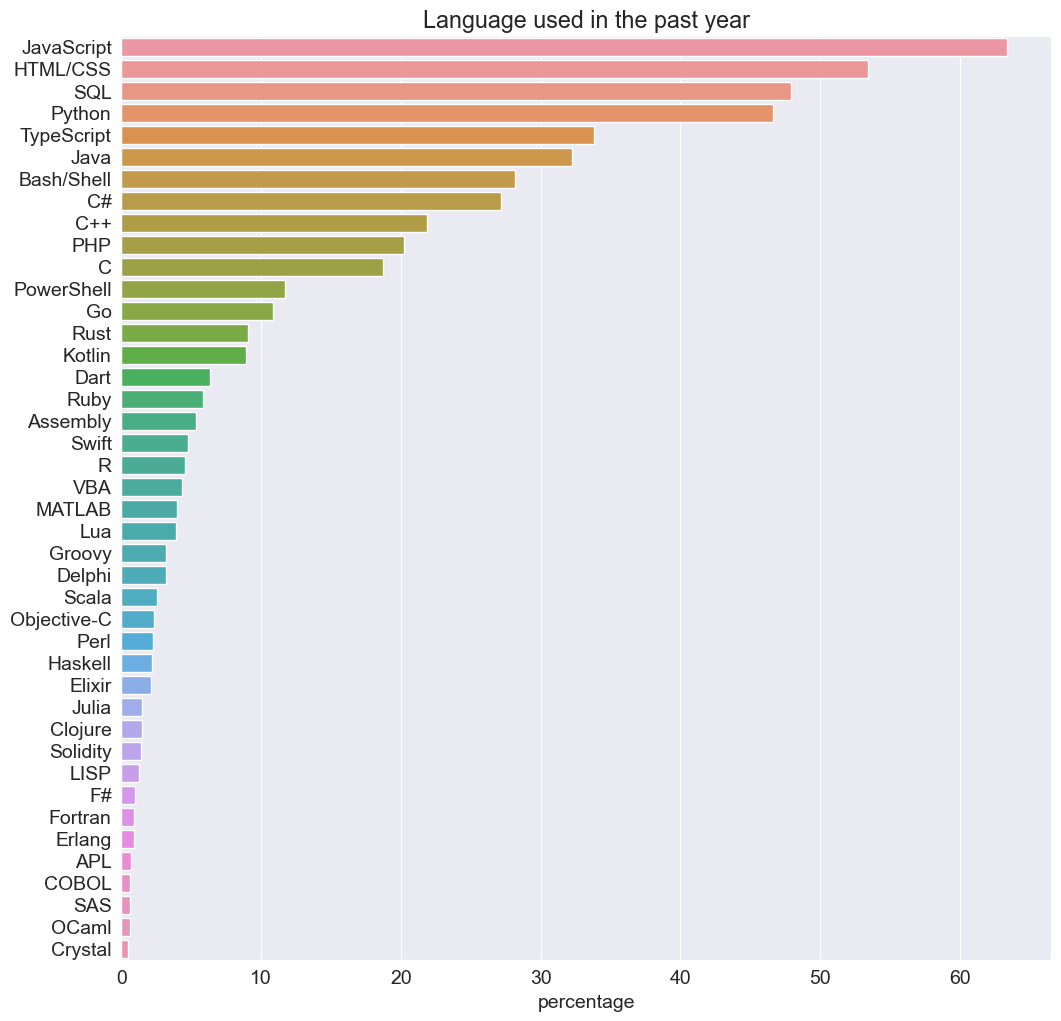

In [29]:
plt.figure(figsize = (12,12))
plt.title('Language used in the past year')   
sns.barplot(x = language_df_total, y = language_df_total.index)
plt.xlabel('percentage')
plt.show()

In [30]:
k_country = survey_df[ (survey_df.Country == 'South Korea') | (survey_df.Country == 'Republic of Korea') ]
k_country           

Country              Age             Gender  \
ResponseId                                                          
1289              South Korea  25-34 years old  Prefer not to say   
2933        Republic of Korea  35-44 years old                Man   
2991              South Korea  25-34 years old                Man   
3024              South Korea  25-34 years old                Man   
3161              South Korea  18-24 years old                Man   
...                       ...              ...                ...   
70985             South Korea  45-54 years old              Woman   
71427             South Korea  25-34 years old                Man   
72114       Republic of Korea  25-34 years old                Man   
72244             South Korea  25-34 years old                Man   
73026             South Korea  35-44 years old                Man   

                                                      EdLevel YearsCode  \
ResponseId                                                                
1289             Bachelor’s degree (B.A., B.S., B.Eng., etc.)         6   
2933          Master’s degree (M.A., M.S., M.Eng., MBA, etc.)        12   
2991          Master’s degree (M.A., M.S., M.Eng., MBA, etc.)        11   
3024        Some college/university study without earning ...         8   
3161                      Associate degree (A.A., A.S., etc.)         6   
...                                                       ...       ...   
70985         Master’s degree (M.A., M.S., M.Eng., MBA, etc.)        25   
71427            Bachelor’s degree (B.A., B.S., B.Eng., etc.)         4   
72114            Bachelor’s degree (B.A., B.S., B.Eng., etc.)         3   
72244            Bachelor’s degree (B.A., B.S., B.Eng., etc.)        15   
73026            Bachelor’s degree (B.A., B.S., B.Eng., etc.)        20   

                YearsCodePro  \
ResponseId                     
1289                     NaN   
2933                      10   
2991                       5   
3024                       5   
3161                     NaN   
...                      ...   
70985                     21   
71427       Less than 1 year   
72114       Less than 1 year   
72244                      7   
73026                     16   

                                       LanguageHaveWorkedWith  \
ResponseId                                                      
1289                                                     Rust   
2933                                              Python;Rust   
2991                           C++;HTML/CSS;JavaScript;Python   
3024            Bash/Shell;Go;JavaScript;OCaml;SQL;TypeScript   
3161                         C#;Go;JavaScript;Rust;TypeScript   
...                                                       ...   
70985               C;C++;HTML/CSS;Java;JavaScript;Python;SQL   
71427                                                     NaN   
72114                                          Python;R;Swift   
72244       Assembly;Bash/Shell;C;C#;C++;HTML/CSS;JavaScri...   
73026                                      C;Java;Objective-C   

                                       LanguageWantToWorkWith  \
ResponseId                                                      
1289                                                     Rust   
2933                                   Python;Rust;TypeScript   
2991                           C++;JavaScript;Rust;TypeScript   
3024        Bash/Shell;Crystal;Elixir;Erlang;F#;Go;JavaScr...   
3161                                                  C#;Rust   
...                                                       ...   
70985          HTML/CSS;Java;JavaScript;Python;SQL;TypeScript   
71427                                                     NaN   
72114                     JavaScript;Kotlin;Objective-C;Swift   
72244       Bash/Shell;Dart;Go;HTML/CSS;JavaScript;Solidit...   
73026                                           Go;JavaScript   

                 LearnCodeCoursesCert  

In [31]:
def split_multicolumn(Series):
    df = pd.DataFrame(False, columns = (Series.dropna().str.split(';').str[0].unique()), index = Series.index)
    # for idx, rep in Series[Series.notnull()].str.split(';').items:
    #     for one in rep:
    #         df.at[idx, one.strip()] = True
    for idx, rep in Series.str.split(';').items():
        # NaN이 아닌 값을 분기
        if isinstance(rep, list):
            for one in rep:
                df.at[idx, one.strip()] = True
        else :
            pass
    return df
split_multicolumn(k_country['LanguageHaveWorkedWith'])

Rust  Python    C++  Bash/Shell     C#  Haskell  HTML/CSS  \
ResponseId                                                               
1289         True   False  False       False  False    False     False   
2933         True    True  False       False  False    False     False   
2991        False    True   True       False  False    False      True   
3024        False   False  False        True  False    False     False   
3161         True   False  False       False   True    False     False   
...           ...     ...    ...         ...    ...      ...       ...   
70985       False    True   True       False  False    False      True   
71427       False   False  False       False  False    False     False   
72114       False    True  False       False  False    False     False   
72244       False   False   True        True   True    False      True   
73026       False   False  False       False  False    False     False   

            JavaScript   Java      C  Assembly   Dart     Go    APL  \
ResponseId                                                            
1289             False  False  False     False  False  False  False   
2933             False  False  False     False  False  False  False   
2991              True  False  False     False  False  False  False   
3024              True  False  False     False  False   True  False   
3161              True  False  False     False  False   True  False   
...                ...    ...    ...       ...    ...    ...    ...   
70985             True   True   True     False  False  False  False   
71427            False  False  False     False  False  False  False   
72114            False  False  False     False  False  False  False   
72244             True  False   True      True  False  False  False   
73026            False   True   True     False  False  False  False   

            Objective-C  Scala  Clojure  Elixir  TypeScript  Swift   Perl  \
ResponseId                                                                  
1289              False  False    False   False       False  False  False   
2933              False  False    False   False       False  False  False   
2991              False  False    False   False       False  False  False   
3024              False  False    False   False        True  False  False   
3161              False  False    False   False        True  False  False   
...                 ...    ...      ...     ...         ...    ...    ...   
70985             False  False    False   False       False  False  False   
71427             False  False    False   False       False  False  False   
72114             False  False    False   False       False   True  False   
72244             False  False    False   False        True  False  False   
73026              True  False    False   False       False  False  False   

            Kotlin  MATLAB  Delphi OCaml   SQL     R  SAS Julia PowerShell  \
ResponseId                                                                   
1289         False   False   False   NaN   NaN   NaN  NaN   NaN        NaN   
2933         False   False   False   NaN   NaN   NaN  NaN   NaN        NaN   
2991         False   False   False   NaN   NaN   NaN  NaN   NaN        NaN   
3024         False   False   False  True  True   NaN  NaN   NaN        NaN   
3161         False   False   False   NaN   NaN   NaN  NaN   NaN        NaN   
...            ...     ...     ...   ...   ...   ...  ...   ...        ...   
70985        False   False   False   NaN  True   NaN  NaN   NaN        NaN   
71427        False   False   False   NaN   NaN   NaN  NaN   NaN        NaN   
72114        False   False   False   NaN   NaN  True  NaN   NaN        NaN   
72244        False   False   False   NaN  True   NaN  NaN   NaN       True   
73026        False   False   False   NaN   NaN   NaN  NaN   NaN        NaN   

             PHP Ruby  VBA COBOL LISP  Lua Solidity Crystal Erlang   F#  \
ResponseId                        

In [32]:
language_df = split_multicolumn(k_country.LanguageHaveWorkedWith)
language_df

Rust  Python    C++  Bash/Shell     C#  Haskell  HTML/CSS  \
ResponseId                                                               
1289         True   False  False       False  False    False     False   
2933         True    True  False       False  False    False     False   
2991        False    True   True       False  False    False      True   
3024        False   False  False        True  False    False     False   
3161         True   False  False       False   True    False     False   
...           ...     ...    ...         ...    ...      ...       ...   
70985       False    True   True       False  False    False      True   
71427       False   False  False       False  False    False     False   
72114       False    True  False       False  False    False     False   
72244       False   False   True        True   True    False      True   
73026       False   False  False       False  False    False     False   

            JavaScript   Java      C  Assembly   Dart     Go    APL  \
ResponseId                                                            
1289             False  False  False     False  False  False  False   
2933             False  False  False     False  False  False  False   
2991              True  False  False     False  False  False  False   
3024              True  False  False     False  False   True  False   
3161              True  False  False     False  False   True  False   
...                ...    ...    ...       ...    ...    ...    ...   
70985             True   True   True     False  False  False  False   
71427            False  False  False     False  False  False  False   
72114            False  False  False     False  False  False  False   
72244             True  False   True      True  False  False  False   
73026            False   True   True     False  False  False  False   

            Objective-C  Scala  Clojure  Elixir  TypeScript  Swift   Perl  \
ResponseId                                                                  
1289              False  False    False   False       False  False  False   
2933              False  False    False   False       False  False  False   
2991              False  False    False   False       False  False  False   
3024              False  False    False   False        True  False  False   
3161              False  False    False   False        True  False  False   
...                 ...    ...      ...     ...         ...    ...    ...   
70985             False  False    False   False       False  False  False   
71427             False  False    False   False       False  False  False   
72114             False  False    False   False       False   True  False   
72244             False  False    False   False        True  False  False   
73026              True  False    False   False       False  False  False   

            Kotlin  MATLAB  Delphi OCaml   SQL     R  SAS Julia PowerShell  \
ResponseId                                                                   
1289         False   False   False   NaN   NaN   NaN  NaN   NaN        NaN   
2933         False   False   False   NaN   NaN   NaN  NaN   NaN        NaN   
2991         False   False   False   NaN   NaN   NaN  NaN   NaN        NaN   
3024         False   False   False  True  True   NaN  NaN   NaN        NaN   
3161         False   False   False   NaN   NaN   NaN  NaN   NaN        NaN   
...            ...     ...     ...   ...   ...   ...  ...   ...        ...   
70985        False   False   False   NaN  True   NaN  NaN   NaN        NaN   
71427        False   False   False   NaN   NaN   NaN  NaN   NaN        NaN   
72114        False   False   False   NaN   NaN  True  NaN   NaN        NaN   
72244        False   False   False   NaN  True   NaN  NaN   NaN       True   
73026        False   False   False   NaN   NaN   NaN  NaN   NaN        NaN   

             PHP Ruby  VBA COBOL LISP  Lua Solidity Crystal Erlang   F#  \
ResponseId                        

In [33]:
k_country_language_total = split_multicolumn(k_country.LanguageHaveWorkedWith).sum().sort_values(ascending = False)
k_country_language_total

JavaScript     188
Python         153
HTML/CSS       137
Java           125
SQL            109
TypeScript     101
C++             87
Bash/Shell      72
C               72
C#              62
Kotlin          54
Go              34
PHP             33
PowerShell      25
Rust            24
Swift           23
Dart            18
R               15
Assembly        15
Ruby            12
MATLAB          11
Objective-C     10
Groovy           8
Lua              8
VBA              7
Haskell          7
Scala            7
Elixir           7
Julia            6
Delphi           5
OCaml            4
Perl             4
Solidity         4
SAS              3
Clojure          3
LISP             3
F#               3
APL              2
COBOL            2
Erlang           2
Crystal          1
Fortran          1
dtype: object

In [34]:
k_country_language_percentage = k_country_language_total / k_country_language_total.sum() * 100
k_country_language_percentage

JavaScript     12.815269
Python         10.429448
HTML/CSS        9.338787
Java            8.520791
SQL              7.43013
TypeScript      6.884799
C++              5.93047
Bash/Shell      4.907975
C               4.907975
C#              4.226312
Kotlin          3.680982
Go              2.317655
PHP             2.249489
PowerShell      1.704158
Rust            1.635992
Swift           1.567825
Dart            1.226994
R               1.022495
Assembly        1.022495
Ruby            0.817996
MATLAB           0.74983
Objective-C     0.681663
Groovy          0.545331
Lua             0.545331
VBA             0.477164
Haskell         0.477164
Scala           0.477164
Elixir          0.477164
Julia           0.408998
Delphi          0.340832
OCaml           0.272665
Perl            0.272665
Solidity        0.272665
SAS             0.204499
Clojure         0.204499
LISP            0.204499
F#              0.204499
APL             0.136333
COBOL           0.136333
Erlang          0.136333


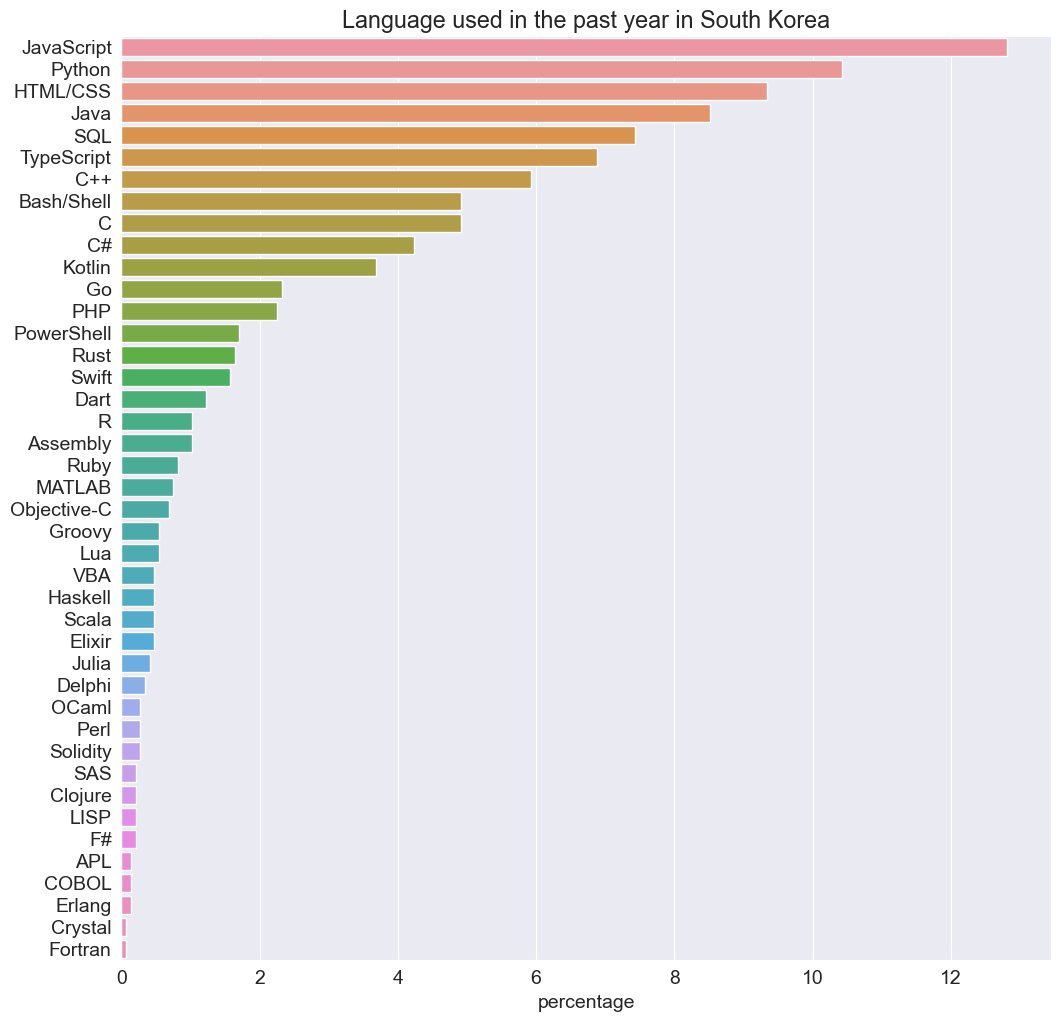

In [35]:
plt.figure(figsize = (12,12))
plt.title('Language used in the past year in South Korea')   
sns.barplot(x = k_country_language_percentage, y = k_country_language_percentage.index)
plt.xlabel('percentage')
plt.show()

In [36]:
data_lang = survey_df[(survey_df['DevType'] == 'Data scientist or machine learning specialist')]
data_lang.LanguageHaveWorkedWith

ResponseId
464                          Bash/Shell;Python;SQL
1090                                        Python
1705             Elixir;Python;Rust;SQL;TypeScript
1708                                        Python
1871                 Bash/Shell;Go;HTML/CSS;Python
                           ...                    
72707                                        R;SQL
72793                            Bash/Shell;Python
73045                                   C++;Python
73065                        Java;Python;Scala;SQL
73265    Bash/Shell;HTML/CSS;JavaScript;Python;SQL
Name: LanguageHaveWorkedWith, Length: 498, dtype: object

In [37]:
def split_multicolumn(Series):
    df = pd.DataFrame(False, columns = (Series.dropna().str.split(';').str[0].unique()), index = Series.index)
    # for idx, rep in Series[Series.notnull()].str.split(';').items:
    #     for one in rep:
    #         df.at[idx, one.strip()] = True
    for idx, rep in Series.str.split(';').items():
        # NaN이 아닌 값을 분기
        if isinstance(rep, list):
            for one in rep:
                df.at[idx, one.strip()] = True
        else :
            pass
    return df
split_multicolumn(data_lang.LanguageHaveWorkedWith)

Bash/Shell  Python  Elixir  Assembly  Julia  JavaScript    C++  \
ResponseId                                                                   
464               True    True   False     False  False       False  False   
1090             False    True   False     False  False       False  False   
1705             False    True    True     False  False       False  False   
1708             False    True   False     False  False       False  False   
1871              True    True   False     False  False       False  False   
...                ...     ...     ...       ...    ...         ...    ...   
72707            False   False   False     False  False       False  False   
72793             True    True   False     False  False       False  False   
73045            False    True   False     False  False       False   True   
73065            False    True   False     False  False       False  False   
73265             True    True   False     False  False        True  False   

               C#  HTML/CSS  MATLAB      C      R  COBOL     Go   Java    APL  \
ResponseId                                                                      
464         False     False   False  False  False  False  False  False  False   
1090        False     False   False  False  False  False  False  False  False   
1705        False     False   False  False  False  False  False  False  False   
1708        False     False   False  False  False  False  False  False  False   
1871        False      True   False  False  False  False   True  False  False   
...           ...       ...     ...    ...    ...    ...    ...    ...    ...   
72707       False     False   False  False   True  False  False  False  False   
72793       False     False   False  False  False  False  False  False  False   
73045       False     False   False  False  False  False  False  False  False   
73065       False     False   False  False  False  False  False   True  False   
73265       False      True   False  False  False  False  False  False  False   

             Dart  Haskell  Objective-C  PowerShell  Clojure  Delphi     F#  \
ResponseId                                                                    
464         False    False        False       False    False   False  False   
1090        False    False        False       False    False   False  False   
1705        False    False        False       False    False   False  False   
1708        False    False        False       False    False   False  False   
1871        False    False        False       False    False   False  False   
...           ...      ...          ...         ...      ...     ...    ...   
72707       False    False        False       False    False   False  False   
72793       False    False        False       False    False   False  False   
73045       False    False        False       False    False   False  False   
73065       False    False        False       False    False   False  False   
73265       False    False        False       False    False   False  False   

             SQL  Rust TypeScript  SAS Scala  PHP LISP Perl Kotlin Swift Ruby  \
ResponseId                                                                      
464         True   NaN        NaN  NaN   NaN  NaN  NaN  NaN    NaN   NaN  NaN   
1090         NaN   NaN        NaN  NaN   NaN  NaN  NaN  NaN    NaN   NaN  NaN   
1705        True  True       True  NaN   NaN  NaN  NaN  NaN    NaN   NaN  NaN   
1708         NaN   NaN        NaN  NaN   NaN  NaN  NaN  NaN    NaN   NaN  NaN   
1871         NaN   NaN        NaN  NaN   NaN  NaN  NaN  NaN    NaN   NaN  NaN   
...          ...   ...        ...  ...   ...  ...  ...  ...    ...   ...  ...   
72707       True   NaN        NaN  NaN   NaN  NaN  NaN  NaN    NaN   NaN  NaN   
72793        NaN   NaN        NaN  NaN   NaN  NaN  NaN  NaN    NaN   NaN  NaN   
73045        NaN   NaN        NaN  NaN   NaN  NaN  NaN  NaN    NaN   NaN  NaN   
73065       True   NaN  

In [38]:
data = split_multicolumn(data_lang.LanguageHaveWorkedWith)
data_per = (data.sum()/sum(data.sum())*100).sort_values(ascending = False)

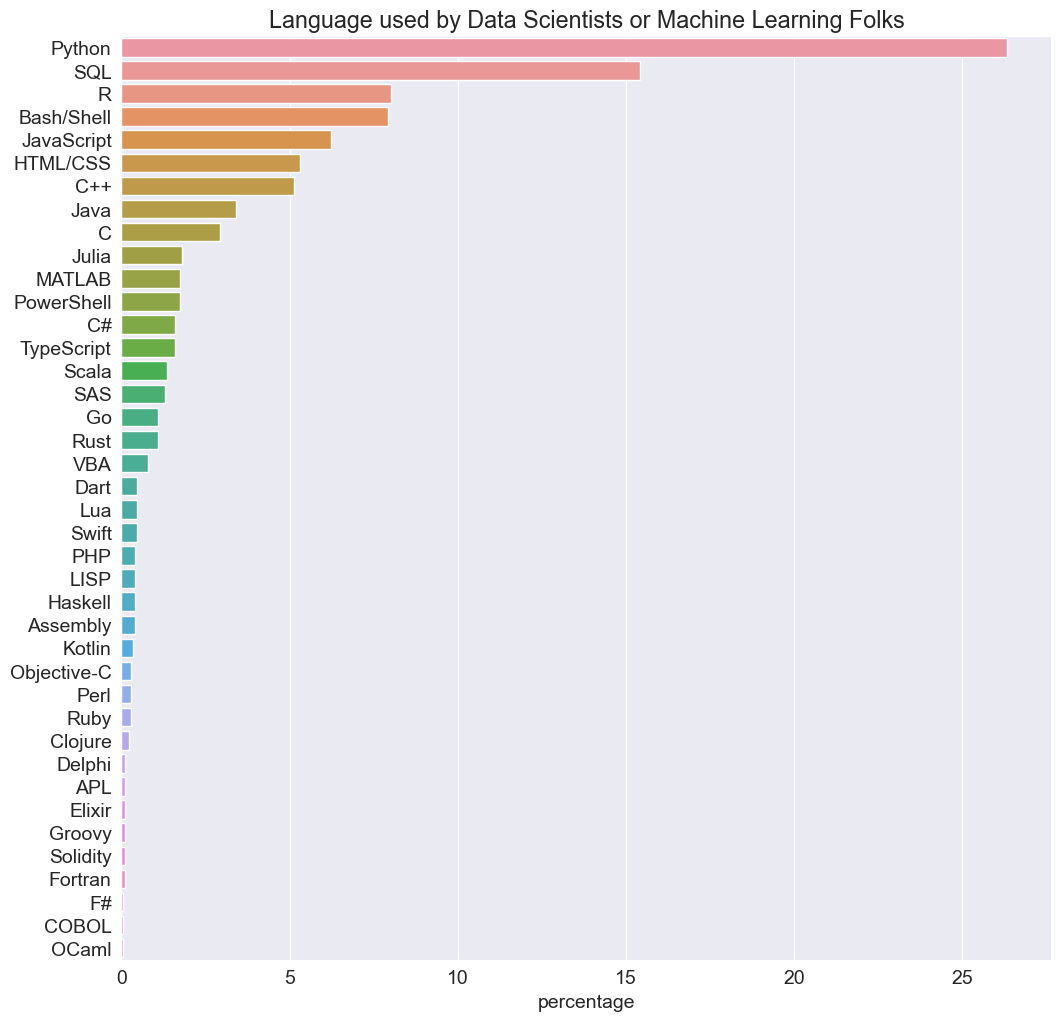

In [39]:
plt.figure(figsize = (12,12))
plt.title('Language used by Data Scientists or Machine Learning Folks')   
sns.barplot(x = data_per, y = data_per.index)
plt.xlabel('percentage')
plt.show()

In [40]:
survey_df.LanguageWantToWorkWith

ResponseId
1                                                   NaN
2                                       Rust;TypeScript
3                 C#;C++;HTML/CSS;JavaScript;TypeScript
4                                     C#;SQL;TypeScript
5            C#;Elixir;F#;Go;JavaScript;Rust;TypeScript
                              ...                      
73264    Bash/Shell;Go;JavaScript;Python;SQL;TypeScript
73265                        HTML/CSS;JavaScript;Python
73266             C#;HTML/CSS;JavaScript;PHP;Python;SQL
73267                                            Delphi
73268                        PowerShell;Rust;TypeScript
Name: LanguageWantToWorkWith, Length: 73268, dtype: object

In [41]:
def split_multicolumn(Series):
    df = pd.DataFrame(False, columns = (Series.dropna().str.split(';').str[0].unique()), index = Series.index)
    # for idx, rep in Series[Series.notnull()].str.split(';').items:
    #     for one in rep:
    #         df.at[idx, one.strip()] = True
    for idx, rep in Series.str.split(';').items():
        # NaN이 아닌 값을 분기
        if isinstance(rep, list):
            for one in rep:
                df.at[idx, one.strip()] = True
        else :
            pass
    return df
split_multicolumn(survey_df.LanguageHaveWorkedWith)

JavaScript     C#    C++      C  Delphi  Bash/Shell  Elixir  \
ResponseId                                                                
1                False  False  False  False   False       False   False   
2                 True  False  False  False   False       False   False   
3                 True   True   True  False   False       False   False   
4                 True   True  False  False   False       False   False   
5                 True   True  False  False   False       False   False   
...                ...    ...    ...    ...     ...         ...     ...   
73264             True  False  False  False   False        True   False   
73265             True  False  False  False   False        True   False   
73266             True  False  False  False   False       False   False   
73267            False   True  False  False    True       False   False   
73268             True   True  False  False   False       False   False   

            HTML/CSS  Python    VBA   Dart  MATLAB   Java  Haskell  Assembly  \
ResponseId                                                                     
1              False   False  False  False   False  False    False     False   
2              False   False  False  False   False  False    False     False   
3               True    True  False  False   False  False    False     False   
4              False   False  False  False   False  False    False     False   
5               True   False  False  False   False  False    False     False   
...              ...     ...    ...    ...     ...    ...      ...       ...   
73264          False    True  False   True   False  False    False     False   
73265           True    True  False  False   False  False    False     False   
73266           True    True  False  False   False  False    False     False   
73267          False   False   True  False   False  False    False     False   
73268          False   False  False  False   False  False    False     False   

            Groovy     Go  Swift    APL  Crystal    PHP  Clojure  Erlang  \
ResponseId                                                                 
1            False  False  False  False    False  False    False   False   
2            False  False  False  False    False  False    False   False   
3            False  False  False  False    False  False    False   False   
4            False  False  False  False    False  False    False   False   
5            False  False   True  False    False  False    False   False   
...            ...    ...    ...    ...      ...    ...      ...     ...   
73264        False  False  False  False    False   True    False   False   
73265        False  False  False  False    False  False    False   False   
73266        False  False  False  False    False   True    False   False   
73267        False  False  False  False    False  False    False   False   
73268        False  False  False  False    False  False    False   False   

             Rust   Ruby   Perl  Kotlin  TypeScript    SQL    Lua  COBOL  \
ResponseId                                                                 
1           False  False  False   False       False  False  False  False   
2           False  False  False   False        True  False  False  False   
3           False  False  False   False       False  False  False  False   
4           False  False  False   False        True   True  False  False   
5           False  False  False   False        True   True  False  False   
...           ...    ...    ...     ...         ...    ...    ...    ...   
73264       False  False  False   False        True   True  False  False   
73265       False  False  False   False       False   True  False  False   
73266       False  False  False   False       False   True  False  False   
73267       False  False  False   False       False  False  False  False   
73268       False  False  False   False        True   True   True  False   

            Power

In [42]:
lange_fav = split_multicolumn(survey_df.LanguageHaveWorkedWith)
fav_per = (lange_fav.sum()/sum(lange_fav.sum())*100).sort_values(ascending = False)

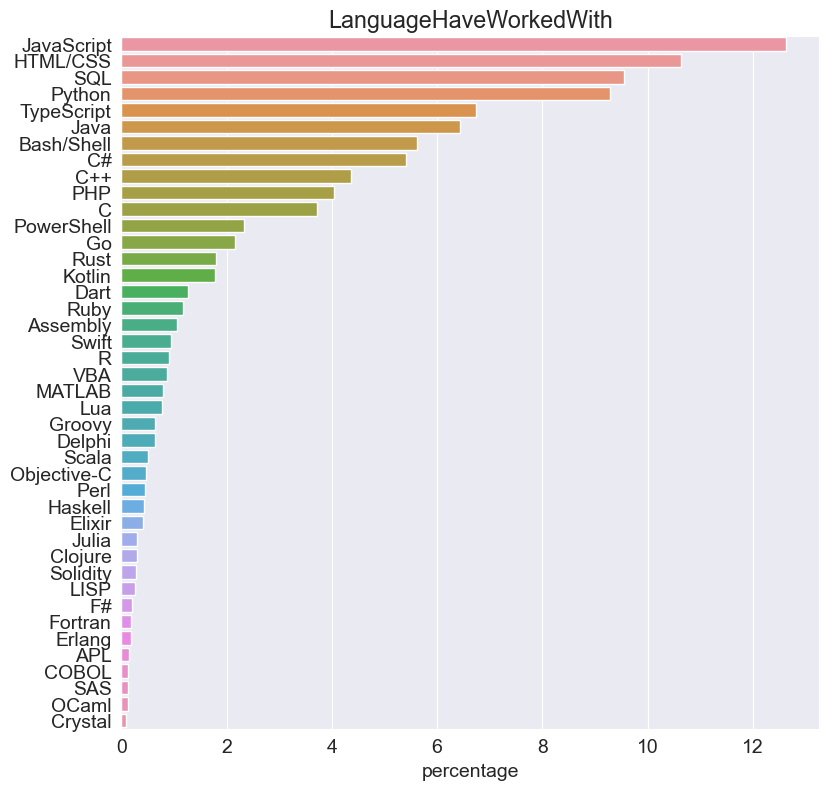

In [43]:
plt.figure(figsize = (9,9))
plt.title('LanguageHaveWorkedWith')   
sns.barplot(x = fav_per, y = fav_per.index)
plt.xlabel('percentage')
plt.show()

In [44]:
survey_raw_df.DatabaseHaveWorkedWith

ResponseId
1                                                      NaN
2                                                      NaN
3                                     Microsoft SQL Server
4                                     Microsoft SQL Server
5        Cloud Firestore;Elasticsearch;Microsoft SQL Se...
                               ...                        
73264                 Elasticsearch;MySQL;PostgreSQL;Redis
73265                  Elasticsearch;MongoDB;Oracle;SQLite
73266    MariaDB;Microsoft SQL Server;MySQL;PostgreSQL;...
73267                  Microsoft SQL Server;MongoDB;Oracle
73268                     Microsoft SQL Server;Neo4j;Redis
Name: DatabaseHaveWorkedWith, Length: 73268, dtype: object

In [45]:
def split_multicolumn(Series):
    df = pd.DataFrame(False, columns = (Series.dropna().str.split(';').str[0].unique()), index = Series.index)
    # for idx, rep in Series[Series.notnull()].str.split(';').items:
    #     for one in rep:
    #         df.at[idx, one.strip()] = True
    for idx, rep in Series.str.split(';').items():
        # NaN이 아닌 값을 분기
        if isinstance(rep, list):
            for one in rep:
                df.at[idx, one.strip()] = True
        else :
            pass
    return df
split_multicolumn(survey_raw_df.DatabaseHaveWorkedWith)

Microsoft SQL Server  Cloud Firestore  MongoDB  Couchbase  \
ResponseId                                                              
1                          False            False    False      False   
2                          False            False    False      False   
3                           True            False    False      False   
4                           True            False    False      False   
5                           True             True    False      False   
...                          ...              ...      ...        ...   
73264                      False            False    False      False   
73265                      False            False     True      False   
73266                       True            False    False      False   
73267                       True            False     True      False   
73268                       True            False    False      False   

            PostgreSQL  DynamoDB  Elasticsearch  Cassandra  MySQL  MariaDB  \
ResponseId                                                                   
1                False     False          False      False  False    False   
2                False     False          False      False  False    False   
3                False     False          False      False  False    False   
4                False     False          False      False  False    False   
5                False     False           True      False  False    False   
...                ...       ...            ...        ...    ...      ...   
73264             True     False           True      False   True    False   
73265            False     False           True      False  False    False   
73266             True     False          False      False   True     True   
73267            False     False          False      False  False    False   
73268            False     False          False      False  False    False   

            SQLite  IBM DB2  CouchDB  Oracle  Neo4j  \
ResponseId                                            
1            False    False    False   False  False   
2            False    False    False   False  False   
3            False    False    False   False  False   
4            False    False    False   False  False   
5            False    False    False   False  False   
...            ...      ...      ...     ...    ...   
73264        False    False    False   False  False   
73265         True    False    False    True  False   
73266         True    False    False   False  False   
73267        False    False    False    True  False   
73268        False    False    False   False   True   

            Firebase Realtime Database  Redis  
ResponseId                                     
1                                False  False  
2                                False  False  
3                                False  False  
4                                False  False  
5                                 True  False  
...                                ...    ...  
73264                            False   True  
73265                            False  False  
73266                            False  False  
73267                            False  False  
73268                            False   True  

[73268 rows x 17 columns]

In [46]:
data_la = split_multicolumn(survey_raw_df.DatabaseHaveWorkedWith)
data_laper = (data_la.sum()/sum(data_la.sum())*100).sort_values(ascending = False)

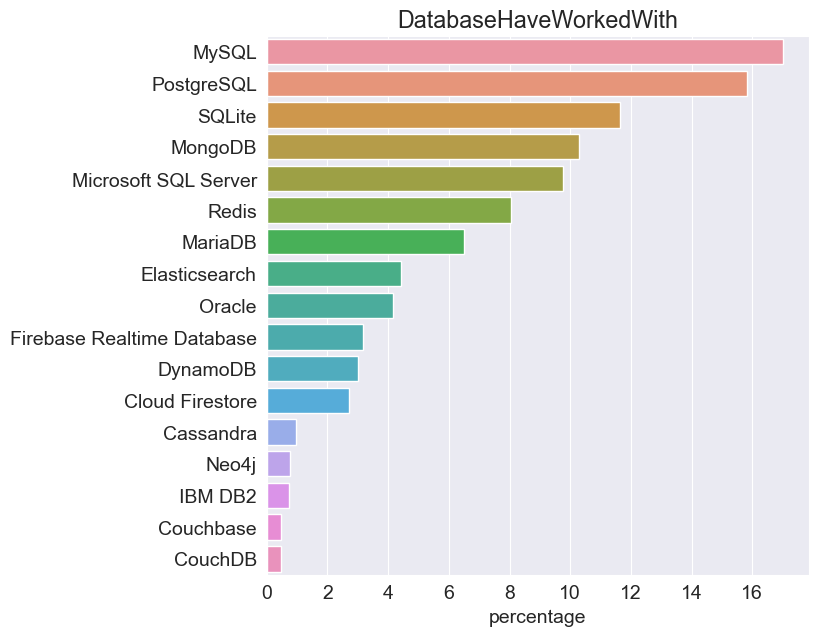

In [47]:
plt.figure(figsize = (7,7))
plt.title('DatabaseHaveWorkedWith')   
sns.barplot(x = data_laper, y = data_laper.index)
plt.xlabel('percentage')
plt.show()

## folium

- folium은 파이썬의 라이브러리로 지도 데이터를 시각화하는데 도움
- leaflet.js을 기반으로 만듬
- 지도에 마커를 표현하거나 범위를 나타내는 다양한 도형을 입력할 수 있음

### 아나콘다 프롬프트를 켜고
### conda install -c conda-forge folium 입력

In [48]:
import folium

In [49]:
# 플레이데이터 독산 위도, 경도
latitude, longitude = (37.468251, 126.886212)

In [50]:
m = folium.Map(location = [latitude, longitude], zoom_start=17, width=750, height= 500)
folium.Marker([latitude,longitude], popup='플레이데이터', tooltip='플레이데이터').add_to(m)
m


In [51]:
survey_raw_df = pd.read_csv('data/survey_results_public.csv', index_col = 'ResponseId')

In [52]:
# 좌표
countries_geojson = 'https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json'

In [53]:
country_counts = survey_raw_df.Country.value_counts()
country_counts_df = pd.DataFrame({'Country' : country_counts.index,
                                  'Count' : country_counts.values})
country_counts_df

Country  Count
0                             United States of America  13543
1                                                India   6639
2                                              Germany   5395
3    United Kingdom of Great Britain and Northern I...   4190
4                                               Canada   2490
..                                                 ...    ...
175                                             Monaco      1
176                                           Djibouti      1
177                                         Seychelles      1
178                                    Solomon Islands      1
179                              Saint Kitts and Nevis      1

[180 rows x 2 columns]

json 속성 feature.properties.name 의 값과 우리가 csv에서 가져온 country name이 일치해야 함
- Russian Federation의 값이 불일치한데, Russia로 변경해 줌

In [54]:
country_counts_df.at[12, 'Country'] = 'Russia'

### Choropleth는 데이터를 담고 있는 pd dataF/ Series와 기하학 데이터를 담는 Geo/TopoJSON를 바인딩하여 시각화 표현

In [55]:
m = folium.Map(location=[30, 0], zoom_start=2)

folium.Choropleth(
    geo_data=countries_geojson,
    data=country_counts_df,
    columns=['Country', 'Count'],
    key_on='feature.properties.name',
    threshold_scale=[1, 30, 100, 300, 1_000, 3_000, 10_000, 14_000],   #bins 라고 생각하면 됨 @@@ 단, 범위 표현은 확실하게
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Respondents",
).add_to(m)

folium.LayerControl().add_to(m)
m

In [56]:
m.save('Country.html')

In [57]:
seoul_geojson="https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json"
m = folium.Map(
    location=[37.57, 126.99],
    zoom_start=11,
)
folium.Choropleth(
    geo_data=seoul_geojson,
    fill_color="#22AA44",
    fill_opacity=0.4,
    line_opacity=1,
).add_to(m)
m

## WordCloud
### conda install -c conda-forge wordcloud

In [58]:
from wordcloud import WordCloud

In [59]:
survey_raw_df = pd.read_csv('data/survey_results_public.csv', index_col = 'ResponseId')

In [60]:
survey_df.DevType

ResponseId
1                                                      NaN
2                                                      NaN
3        Data scientist or machine learning specialist;...
4                                    Developer, full-stack
5        Developer, front-end;Developer, full-stack;Dev...
                               ...                        
73264                                  Developer, back-end
73265        Data scientist or machine learning specialist
73266    Developer, full-stack;Developer, desktop or en...
73267    Developer, front-end;Developer, desktop or ent...
73268    Developer, front-end;Engineer, data;Engineer, ...
Name: DevType, Length: 73268, dtype: object

- DevType에 있는 모든 NaN값을 제거. 73,268개 데이터가 60,761개로 줄었습니다

In [62]:
temp_words = survey_df.DevType.dropna()
temp_words

ResponseId
3        Data scientist or machine learning specialist;...
4                                    Developer, full-stack
5        Developer, front-end;Developer, full-stack;Dev...
8                            Developer, full-stack;Student
9                                      Developer, back-end
                               ...                        
73264                                  Developer, back-end
73265        Data scientist or machine learning specialist
73266    Developer, full-stack;Developer, desktop or en...
73267    Developer, front-end;Developer, desktop or ent...
73268    Developer, front-end;Engineer, data;Engineer, ...
Name: DevType, Length: 61302, dtype: object

In [64]:
temp_words = temp_words.str.replace(';',' ').str.replace(',',' ')
temp_words

ResponseId
3        Data scientist or machine learning specialist ...
4                                    Developer  full-stack
5        Developer  front-end Developer  full-stack Dev...
8                            Developer  full-stack Student
9                                      Developer  back-end
                               ...                        
73264                                  Developer  back-end
73265        Data scientist or machine learning specialist
73266    Developer  full-stack Developer  desktop or en...
73267    Developer  front-end Developer  desktop or ent...
73268    Developer  front-end Engineer  data Engineer  ...
Name: DevType, Length: 61302, dtype: object

In [65]:
words = ' '.join(temp_words)
words

'Data scientist or machine learning specialist Developer  front-end Engineer  data Engineer  site reliability Developer  full-stack Developer  front-end Developer  full-stack Developer  back-end Developer  desktop or enterprise applications Developer  QA or test Developer  full-stack Student Developer  back-end Developer  desktop or enterprise applications Developer  mobile Educator Developer  full-stack Developer  back-end Engineering manager Developer  full-stack Developer  front-end Developer  full-stack Developer  back-end Database administrator Developer  full-stack Academic researcher DevOps specialist Developer  full-stack Developer  full-stack Engineer  data Developer  back-end Developer  desktop or enterprise applications Student Developer  full-stack Developer  back-end Other (please specify): Developer  full-stack Developer  back-end Developer  mobile Developer  full-stack Developer  back-end Developer  desktop or enterprise applications Developer  embedded applications or d

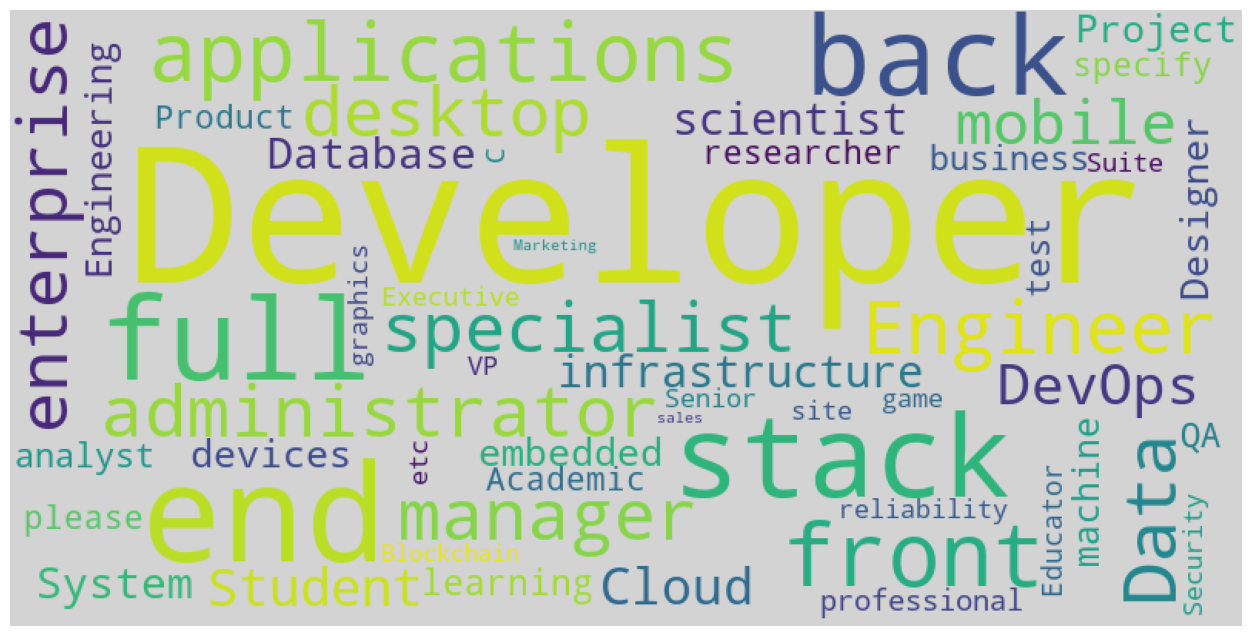

In [67]:
# 한글이 포함되었다면 한글 폰트를 지정해야 한다.
# font_path = ['폰트 경로']
# max_font_size = 60 --> 최대 글자 크기를 지정한다.
wc = WordCloud(collocation_threshold = int(1e6),
               width = 800, height = 400,
               background_color = 'lightgrey').generate(words)
plt.figure(figsize = (16,8))

# x, y축을 그리지 않습니다.
plt.axis('off')

# grid lines를 그리지 않습니다.
plt.grid(False)
plt.imshow(wc)
plt.show()

### 아래 명령어 통해 저장 가능
### 다른 이미지 확장자(jpg,gif)도 사용 가능

In [69]:
wc.to_file('DevType.png')